l_ph =  0.002158894645941278
ps =  0.9887737478411054
pa =  0.011226252158894612
La =  0.1923076923076923
avrZ =  -0.0355374544965158
Nout =  0
Значение пропускания среды T =  0.0
avrZ =  -0.047161998044666115
Nout =  0
Значение пропускания среды T =  0.0
avrZ =  -0.1211827425179477
Nout =  1
Значение пропускания среды T =  1.0
avrZ =  -0.12609524563053504
Nout =  1
Значение пропускания среды T =  1.0
avrZ =  -0.20079739859612675
Nout =  2
Значение пропускания среды T =  2.0
avrZ =  -0.07004847464063862
Nout =  2
Значение пропускания среды T =  1.0
avrZ =  -0.09958937619791663
Nout =  2
Значение пропускания среды T =  1.0
avrZ =  -0.11209173851478393
Nout =  2
Значение пропускания среды T =  1.0
avrZ =  -0.16942579744105096
Nout =  3
Значение пропускания среды T =  1.5
avrZ =  -0.20675826101341158
Nout =  4
Значение пропускания среды T =  2.0
avrZ =  -0.060959135964414206
Nout =  3
Значение пропускания среды T =  1.0
avrZ =  -0.10623287715404633
Nout =  5
Значение пропускания среды T =

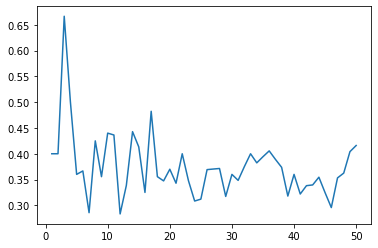

In [15]:
import numpy as np
import random
import math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.graph_objects as go

np.random.seed(1) 

N_var = 4 

μa = 5.2 # см−1
μs = 458 # см−1 
g = 0.72  

Lср = 0.075 # толщина ткани


l_ph = 1 / (μa + μs)
print("l_ph = ", l_ph)
ps = μs / (μa + μs) # вероятность рассеяния
print("ps = ", ps)
pa = 1 - ps
print("pa = ", pa)
La = 1 / μa
print("La = ", La)

N =  0 # Колличество фотонов


Random = np.random.rand()
Random1 = np.random.rand()
ξ = np.random.rand()
θ = np.arccos( (1 + g**2 - ( (1 - g**2) / (1 + g**2 -2 * g * Random)   )**2 ) / (2 * g) )

φ = 2 * Random1

def P(L):
  return (1 / l_ph) * np.exp(-L / l_ph)
  
def new_pos(x0, y0, z0):
  x = x0 + L * np.sin(θ)*np.cos(φ)
  y = y0 + L * np.sin(θ)*np.sin(φ)
  z = z0 - L * np.cos(θ)
  return x, y , z

#fig, ax = plt.subplots(figsize=(10,25),nrows=3, ncols=1)


avrZs = []
Nouts = []
Ns = []
Ts = []
#fig_go = go.Figure()  
for j in range(50):

    avrZ = 0
    Nout = 0
    N += 1
    for j in range(5):
        for i in range(N):
          x = 0
          y = 0
          z = 0

          Xs = []
          Ys = []
          Zs = []


          isout = False
          while np.random.rand() < ps and np.abs(z) < Lср:
            if np.abs(z) >= 0.04165273508788995 and (not(isout)):
                Nout += 1
                isout = True
            Xs.append(x)
            Ys.append(y)
            Zs.append(z)

            Random = np.random.rand()
            Random1 = np.random.rand()

            ξ = np.random.rand()

            cosθ = (1 + g**2 - ( (1 - g**2) / (1 + g**2 -2 * g * Random)   )**2 ) / (2 * g) 
            fracpart, realpart = math.modf(cosθ)
            #print("cosθ = ",cosθ)
            θ = np.arccos( fracpart ) 
            #print("θ = ", θ)

            φ = 2 * np.pi * Random1 + φ

            L = -l_ph * np.log10(1 - ξ)

            x,y,z = new_pos(x, y, z)
          с = np.random.rand(3,)
          '''
          ax[0].plot(Xs, Zs, c= с)
          ax[1].plot(Ys, Zs, c= с)
          ax[2].plot(Xs, Ys, c= с)
          '''  

        
          if len(Zs)>0:
            avrZ += Zs[-1] 
          '''  
          fig_go.add_trace(go.Scatter3d(x = Xs, y = Ys, z = Zs, marker=dict(size=2, colorscale='Viridis',)))
          '''
        ''' 
        ax[0].set_xlabel('X Label')
        ax[0].set_ylabel('Z Label')
        ax[0].axhline(y = -0.04165273508788995, color='k', linestyle='dotted')

        ax[1].set_xlabel('Y Label')
        ax[1].set_ylabel('Z Label')
        ax[1].axhline(y = -0.04165273508788995, color='k', linestyle='dotted')

        ax[2].set_xlabel('X Label')
        ax[2].set_ylabel('Y Label')


        plt.show()


        fig_go.update_layout(    width=800, height=800)
        fig_go.show()
        '''
        print("avrZ = ", avrZ / N)
        print("Nout = ", Nout)
        print("Значение пропускания среды T = ", Nout/N)
    avrZs.append(avrZ/5)
    Nouts.append(Nout/5)
    Ts.append(Nout/N/5)
    Ns.append(N)
plt.plot(Ns, Ts)
plt.show()

In [ ]:
'''
1) подобрать значение толщины ткани, L, при которой только некоторая часть фотонов
достигает нижней границы и найти количество фотонов, Nout, пересекших нижнюю
границу ткани;

L можно выбрать как Lср

2) найти значение пропускания среды, Т , то есть отношение количества фотонов,

вышедших из ткани через нижнюю границу, к их первоначальному количеству;

3) изменяя число фотонов N построить график зависимости Тср(N), где Тср—
усредненное значение пропускания среды для данного N (для его вычисления
необходимо произвести 5 расчетов Т для данного N, затем найти среднее значение
Тср). Найти такое минимальное значение N, при котором увеличение N не будет
приводить к значительным изменениям Tср;

4) для найденного количества фотонов N построить зависимость коэффициента
пропускания от толщины ткани T(L).
'''